In [11]:
import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import tensorflow as tf
import matplotlib.pyplot as plt # Visualization
import seaborn as sns
import warnings # Supress warnings
import os
import random
warnings.filterwarnings('ignore')

In [2]:
from keras.models import Sequential
from keras.layers import *
from keras.callbacks import ModelCheckpoint
from keras.losses import MeanSquaredError
from keras.metrics import RootMeanSquaredError
from keras.optimizers import Adam
from keras.models import load_model

In [3]:
# Seed value
SEED = 2023
# 1. Set the `PYTHONHASHSEED` environment variable at a fixed value
os.environ['PYTHONHASHSEED'] = str(SEED)

# 2. Set the `python` built-in pseudo-random generator at a fixed value
random.seed(SEED)

# 3. Set the `numpy` pseudo-random generator at a fixed value
np.random.seed(SEED)

# 4. Set the `tensorflow` pseudo-random generator at a fixed value
tf.random.set_seed(SEED)

# 5. Configure a new global `tensorflow` session
session_conf = tf.compat.v1.ConfigProto(intra_op_parallelism_threads=1, inter_op_parallelism_threads=1)
sess = tf.compat.v1.Session(graph=tf.compat.v1.get_default_graph(), config=session_conf)
tf.compat.v1.keras.backend.set_session(sess)

In [312]:
df = pd.read_csv("./files/cycl_m.csv", index_col=0)
df.index = pd.to_datetime(df.index, format = '%Y-%m-%d')
df

,Rainfall,Depth_to_Groundwater,Temperature,Drainage_Volume,River_Hydrometry,year,month,quarter,season,month_sin,month_cos,quarter_sin,quarter_cos,season_sin,season_cos
Date,,,,,,,,,,,,,,,
2009-01-31,0.032915,0.216100,0.068714,0.726750,0.396506,2009,1,1,1,5.000000e-01,8.660254e-01,1.000000e+00,6.123234e-17,1.000000e+00,6.123234e-17
2009-02-28,0.073145,0.296982,0.074975,0.936674,0.508567,2009,2,1,1,8.660254e-01,5.000000e-01,1.000000e+00,6.123234e-17,1.000000e+00,6.123234e-17
2009-03-31,0.178683,0.356360,0.236094,0.627008,0.469107,2009,3,1,2,1.000000e+00,6.123234e-17,1.000000e+00,6.123234e-17,1.224647e-16,-1.000000e+00
2009-04-30,0.085162,0.410094,0.413676,0.693265,0.407926,2009,4,2,2,8.660254e-01,-5.000000e-01,1.224647e-16,-1.000000e+00,1.224647e-16,-1.000000e+00
2009-05-31,0.149425,0.428197,0.647873,0.400633,0.201392,2009,5,2,2,5.000000e-01,-8.660254e-01,1.224647e-16,-1.000000e+00,1.224647e-16,-1.000000e+00
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2020-02-29,0.097179,0.583554,0.225748,0.736863,0.420133,2020,2,1,1,8.660254e-01,5.000000e-01,1.000000e+00,6.123234e-17,1.000000e+00,6.123234e-17
2020-03-31,0.366771,0.605731,0.255726,0.721515,0.632459,2020,3,1,2,1.000000e+00,6.123234e-17,1.000000e+00,6.123234e-17,1.224647e-16,-1.000000e+00
2020-04-30,0.217346,0.615560,0.421868,0.896287,0.475913,2020,4,2,2,8.660254e-01,-5.000000e-01,1.224647e-16,-1.000000e+00,1.224647e-16,-1.000000e+00


In [313]:
features_cos = ['Rainfall', 'Depth_to_Groundwater', 'Temperature', 'Drainage_Volume', 'River_Hydrometry', 'day_cos', 'month_cos', 'week_of_year_cos', 'quarter_cos', 'season_cos']
delete2 = [feature for feature in df.columns if feature not in features_cos]

In [314]:
df_cos = df.drop(delete2, axis=1)

In [310]:
df_cos

,Depth_to_Groundwater,Drainage_Volume,River_Hydrometry
Date,,,
2009-01-31,0.216100,0.726750,0.396506
2009-02-28,0.296982,0.936674,0.508567
2009-03-31,0.356360,0.627008,0.469107
2009-04-30,0.410094,0.693265,0.407926
2009-05-31,0.428197,0.400633,0.201392
...,...,...,...
2020-02-29,0.583554,0.736863,0.420133
2020-03-31,0.605731,0.721515,0.632459
2020-04-30,0.615560,0.896287,0.475913


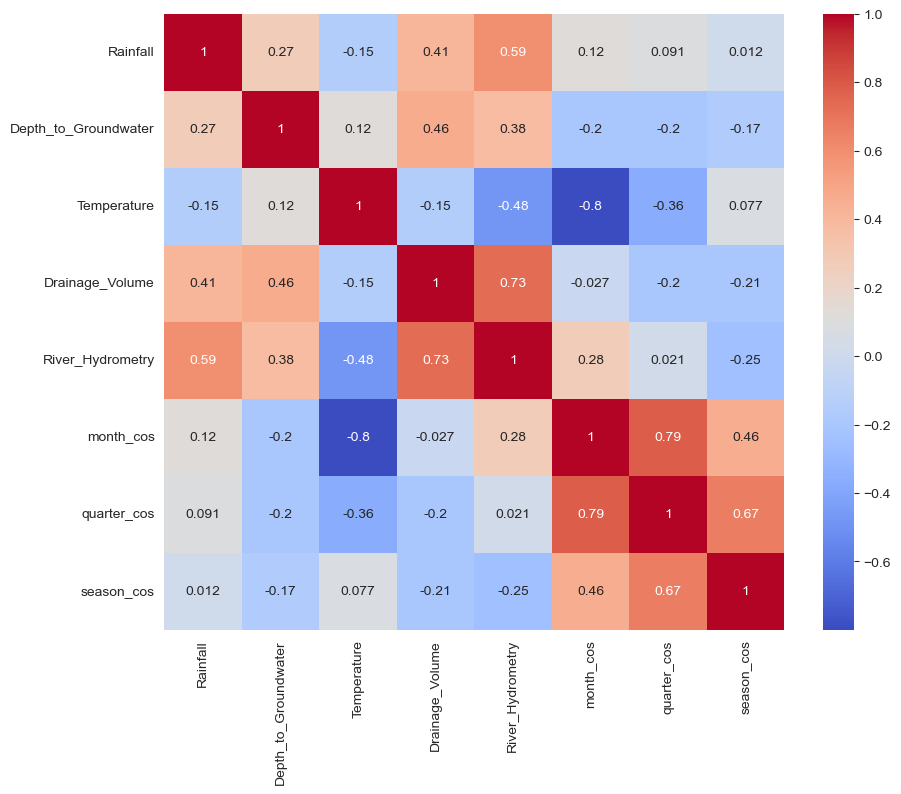

In [316]:
matrix2 = df_cos.corr()
plt.figure(figsize=(10, 8))
sns.heatmap(matrix2, cmap='coolwarm', annot=True)
plt.savefig("graphs/corr_matrix_m.png", format='png', pad_inches=0.3, bbox_inches='tight', transparent=True)

In [393]:
features_new = ['Depth_to_Groundwater', 'Drainage_Volume', 'River_Hydrometry', 'Rainfall', 'month_cos']
delete3 = [feature for feature in df_cos.columns if feature not in features_new]
df_new = df_cos.drop(delete3, axis=1)

In [394]:
df = df_new
df

,Rainfall,Depth_to_Groundwater,Drainage_Volume,River_Hydrometry,month_cos
Date,,,,,
2009-01-31,0.032915,0.216100,0.726750,0.396506,8.660254e-01
2009-02-28,0.073145,0.296982,0.936674,0.508567,5.000000e-01
2009-03-31,0.178683,0.356360,0.627008,0.469107,6.123234e-17
2009-04-30,0.085162,0.410094,0.693265,0.407926,-5.000000e-01
2009-05-31,0.149425,0.428197,0.400633,0.201392,-8.660254e-01
...,...,...,...,...,...
2020-02-29,0.097179,0.583554,0.736863,0.420133,5.000000e-01
2020-03-31,0.366771,0.605731,0.721515,0.632459,6.123234e-17
2020-04-30,0.217346,0.615560,0.896287,0.475913,-5.000000e-01


In [392]:
features_new = ['Depth_to_Groundwater', 'Drainage_Volume', 'River_Hydrometry']
delete3 = [feature for feature in df.columns if feature not in features_new]
df_new = df.drop(delete3, axis=1)
df = df_new
df

,Depth_to_Groundwater,Drainage_Volume,River_Hydrometry
Date,,,
2009-01-31,0.216100,0.726750,0.396506
2009-02-28,0.296982,0.936674,0.508567
2009-03-31,0.356360,0.627008,0.469107
2009-04-30,0.410094,0.693265,0.407926
2009-05-31,0.428197,0.400633,0.201392
...,...,...,...
2020-02-29,0.583554,0.736863,0.420133
2020-03-31,0.605731,0.721515,0.632459
2020-04-30,0.615560,0.896287,0.475913


In [398]:
N_FEATURES  = 5 # multivariate
N_STEPS_IN  = 5 # static window
N_STEPS_OUT = 1  # single-step
TRAIN_SIZE = int((len(df.index)-N_STEPS_IN) * 0.5)
VAL_SIZE = int((len(df.index)-N_STEPS_IN) * 0.2)
#print(TRAIN_SIZE, VAL_SIZE)

In [399]:
def df_to_X_y(df):
    df_as_np = df.to_numpy()
    X = []
    y = []
    for i in range(len(df_as_np)-N_STEPS_IN):
        row = [r for r in df_as_np[i:i+N_STEPS_IN]]
        X.append(row)
        label = df_as_np[i+N_STEPS_IN][1]
        y.append(label)
    return np.array(X), np.array(y)

In [400]:
X1, y1=df_to_X_y(df)
X1.shape, y1.shape

((133, 5, 5), (133,))

In [401]:
def get_sets(df):
    X1, y1 = df_to_X_y(df)
    X_train1, y_train1 = X1[:TRAIN_SIZE], y1[:TRAIN_SIZE]
    X_val1, y_val1 = X1[TRAIN_SIZE:TRAIN_SIZE + VAL_SIZE], y1[TRAIN_SIZE:TRAIN_SIZE + VAL_SIZE]
    X_test1, y_test1 = X1[TRAIN_SIZE + VAL_SIZE:], y1[TRAIN_SIZE + VAL_SIZE:]
    return X1, y1, X_train1, y_train1, X_val1, y_val1, X_test1, y_test1

In [402]:
X1, y1, X_train1, y_train1, X_val1, y_val1, X_test1, y_test1 = get_sets(df)
X_train1.shape, y_train1.shape, X_val1.shape, y_val1.shape, X_test1.shape, y_test1.shape

((66, 5, 5), (66,), (26, 5, 5), (26,), (41, 5, 5), (41,))

In [403]:
def init_model(rnn_units = 64, rnn_units_sec = 90):
    # Use initializers to initialize model parameters with the same values
    INITIALIZER_GLOROT_UNIFORM = tf.keras.initializers.GlorotUniform(seed = SEED)
    INITIALIZER_ORTHOGONAL = tf.keras.initializers.Orthogonal(gain = 1.0, seed = SEED)
    model = Sequential()
    model.add(InputLayer((N_STEPS_IN, N_FEATURES)))
    # model.add(rnn(units                 = rnn_units,
    #                kernel_initializer    = INITIALIZER_GLOROT_UNIFORM,
    #                recurrent_initializer = INITIALIZER_ORTHOGONAL,
    #                return_sequences=True))
    model.add(SimpleRNN(units                 = rnn_units_sec,
                   kernel_initializer    = INITIALIZER_GLOROT_UNIFORM,
                   recurrent_initializer = INITIALIZER_ORTHOGONAL))
    tf.keras.layers.Dropout(0.1),
    model.add(Dense(units= 8, activation='relu', kernel_initializer = INITIALIZER_GLOROT_UNIFORM))
    model.add(Dense(units              = N_STEPS_OUT,
                    kernel_initializer = INITIALIZER_GLOROT_UNIFORM,
                    activation = 'linear'))
    model.summary()
    return model

In [404]:
# Create model instance
model = init_model()

# Visualize model architecture
#tf.keras.utils.plot_model(model, show_shapes=True)

Model: "sequential_51"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 simple_rnn_51 (SimpleRNN)   (None, 90)                8640      
                                                                 
 dense_102 (Dense)           (None, 8)                 728       
                                                                 
 dense_103 (Dense)           (None, 1)                 9         
                                                                 
Total params: 9,377
Trainable params: 9,377
Non-trainable params: 0
_________________________________________________________________


In [405]:
def train_model(df, checkpoint):
    X1, y1, X_train1, y_train1, X_val1, y_val1, X_test1, y_test1 = get_sets(df)
    model = init_model()
    cp = ModelCheckpoint('C:\\Users\\poeppelmann\\DataspellProjects\\dsProject\\rnn_models\\multivar\\'+checkpoint, save_best_only=True)
    model.compile(loss=MeanSquaredError(), optimizer='adam', metrics=[RootMeanSquaredError()])
    model.fit(X_train1, y_train1, validation_data=(X_val1, y_val1), epochs=30, callbacks=[cp])
    return model

In [406]:
def model_predict(df, checkpoint):
    model = load_model('C:\\Users\\poeppelmann\\DataspellProjects\\dsProject\\rnn_models\\multivar\\'+checkpoint)
    X1, y1, X_train1, y_train1, X_val1, y_val1, X_test1, y_test1 = get_sets(df)
    #train_predictions = model.predict(X_train1).flatten()
    #val_predictions = model.predict(X_val1).flatten()
    #predictions = np.concatenate((train_predictions, val_predictions, test_predictions))
    #results = pd.DataFrame(data={'Predictions':predictions, 'Actuals':y1}, index=df.index[5:])
    #results.to_csv('predictions/'+name)
    predictions = pd.Series(model.predict(X_test1).flatten())
    predictions.index = df.index[TRAIN_SIZE+VAL_SIZE+N_STEPS_IN:]
    predictions.name='Depth_to_Groundwater'
    return predictions

In [407]:
checkpoint = '06'

In [408]:
train_model(df, checkpoint)

Model: "sequential_52"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 simple_rnn_52 (SimpleRNN)   (None, 90)                8640      
                                                                 
 dense_104 (Dense)           (None, 8)                 728       
                                                                 
 dense_105 (Dense)           (None, 1)                 9         
                                                                 
Total params: 9,377
Trainable params: 9,377
Non-trainable params: 0
_________________________________________________________________
Epoch 1/30
1/3 [=========>....................] - ETA: 2s - loss: 0.6013 - root_mean_squared_error: 0.7754

INFO:tensorflow:Assets written to: C:\Users\poeppelmann\DataspellProjects\dsProject\rnn_models\multivar\06\assets


INFO:tensorflow:Assets written to: C:\Users\poeppelmann\DataspellProjects\dsProject\rnn_models\multivar\06\assets


3/3 [==============================] - 4s 2s/step - loss: 0.4293 - root_mean_squared_error: 0.6552 - val_loss: 0.1097 - val_root_mean_squared_error: 0.3311
Epoch 2/30
1/3 [=========>....................] - ETA: 0s - loss: 0.1934 - root_mean_squared_error: 0.4398

INFO:tensorflow:Assets written to: C:\Users\poeppelmann\DataspellProjects\dsProject\rnn_models\multivar\06\assets


INFO:tensorflow:Assets written to: C:\Users\poeppelmann\DataspellProjects\dsProject\rnn_models\multivar\06\assets


3/3 [==============================] - 3s 1s/step - loss: 0.1889 - root_mean_squared_error: 0.4346 - val_loss: 0.0695 - val_root_mean_squared_error: 0.2636
Epoch 3/30
1/3 [=========>....................] - ETA: 0s - loss: 0.1188 - root_mean_squared_error: 0.3446

INFO:tensorflow:Assets written to: C:\Users\poeppelmann\DataspellProjects\dsProject\rnn_models\multivar\06\assets


INFO:tensorflow:Assets written to: C:\Users\poeppelmann\DataspellProjects\dsProject\rnn_models\multivar\06\assets


3/3 [==============================] - 3s 2s/step - loss: 0.1079 - root_mean_squared_error: 0.3285 - val_loss: 0.0250 - val_root_mean_squared_error: 0.1582
Epoch 4/30
3/3 [==============================] - 0s 15ms/step - loss: 0.0399 - root_mean_squared_error: 0.1997 - val_loss: 0.0479 - val_root_mean_squared_error: 0.2188
Epoch 5/30
3/3 [==============================] - 0s 15ms/step - loss: 0.0480 - root_mean_squared_error: 0.2190 - val_loss: 0.0446 - val_root_mean_squared_error: 0.2113
Epoch 6/30
1/3 [=========>....................] - ETA: 0s - loss: 0.0384 - root_mean_squared_error: 0.1960

INFO:tensorflow:Assets written to: C:\Users\poeppelmann\DataspellProjects\dsProject\rnn_models\multivar\06\assets


INFO:tensorflow:Assets written to: C:\Users\poeppelmann\DataspellProjects\dsProject\rnn_models\multivar\06\assets


3/3 [==============================] - 2s 1s/step - loss: 0.0424 - root_mean_squared_error: 0.2059 - val_loss: 0.0215 - val_root_mean_squared_error: 0.1465
Epoch 7/30
3/3 [==============================] - 0s 15ms/step - loss: 0.0339 - root_mean_squared_error: 0.1840 - val_loss: 0.0277 - val_root_mean_squared_error: 0.1664
Epoch 8/30
3/3 [==============================] - 0s 16ms/step - loss: 0.0446 - root_mean_squared_error: 0.2111 - val_loss: 0.0254 - val_root_mean_squared_error: 0.1594
Epoch 9/30
1/3 [=========>....................] - ETA: 0s - loss: 0.0392 - root_mean_squared_error: 0.1979

INFO:tensorflow:Assets written to: C:\Users\poeppelmann\DataspellProjects\dsProject\rnn_models\multivar\06\assets


INFO:tensorflow:Assets written to: C:\Users\poeppelmann\DataspellProjects\dsProject\rnn_models\multivar\06\assets


3/3 [==============================] - 3s 1s/step - loss: 0.0347 - root_mean_squared_error: 0.1862 - val_loss: 0.0156 - val_root_mean_squared_error: 0.1249
Epoch 10/30
3/3 [==============================] - 0s 14ms/step - loss: 0.0200 - root_mean_squared_error: 0.1416 - val_loss: 0.0276 - val_root_mean_squared_error: 0.1660
Epoch 11/30
3/3 [==============================] - 0s 19ms/step - loss: 0.0254 - root_mean_squared_error: 0.1595 - val_loss: 0.0296 - val_root_mean_squared_error: 0.1720
Epoch 12/30
3/3 [==============================] - 0s 13ms/step - loss: 0.0257 - root_mean_squared_error: 0.1604 - val_loss: 0.0176 - val_root_mean_squared_error: 0.1325
Epoch 13/30
3/3 [==============================] - 0s 14ms/step - loss: 0.0162 - root_mean_squared_error: 0.1274 - val_loss: 0.0251 - val_root_mean_squared_error: 0.1584
Epoch 14/30
3/3 [==============================] - 0s 16ms/step - loss: 0.0141 - root_mean_squared_error: 0.1187 - val_loss: 0.0296 - val_root_mean_squared_error: 0

INFO:tensorflow:Assets written to: C:\Users\poeppelmann\DataspellProjects\dsProject\rnn_models\multivar\06\assets


INFO:tensorflow:Assets written to: C:\Users\poeppelmann\DataspellProjects\dsProject\rnn_models\multivar\06\assets


3/3 [==============================] - 2s 1s/step - loss: 0.0080 - root_mean_squared_error: 0.0894 - val_loss: 0.0143 - val_root_mean_squared_error: 0.1197
Epoch 20/30
3/3 [==============================] - 0s 19ms/step - loss: 0.0068 - root_mean_squared_error: 0.0827 - val_loss: 0.0152 - val_root_mean_squared_error: 0.1234
Epoch 21/30
3/3 [==============================] - 0s 17ms/step - loss: 0.0065 - root_mean_squared_error: 0.0807 - val_loss: 0.0174 - val_root_mean_squared_error: 0.1321
Epoch 22/30
3/3 [==============================] - 0s 21ms/step - loss: 0.0067 - root_mean_squared_error: 0.0819 - val_loss: 0.0176 - val_root_mean_squared_error: 0.1326
Epoch 23/30
3/3 [==============================] - 0s 19ms/step - loss: 0.0064 - root_mean_squared_error: 0.0797 - val_loss: 0.0256 - val_root_mean_squared_error: 0.1599
Epoch 24/30
3/3 [==============================] - 0s 16ms/step - loss: 0.0065 - root_mean_squared_error: 0.0806 - val_loss: 0.0330 - val_root_mean_squared_error: 0

In [409]:
result = model_predict(df, checkpoint)

2/2 [==============================] - 0s 2ms/step


In [410]:
result

Date
2017-02-28    0.884817
2017-03-31    0.712170
2017-04-30    0.810037
2017-05-31    0.773522
2017-06-30    0.833714
2017-07-31    0.758206
2017-08-31    0.643642
2017-09-30    0.544316
2017-10-31    0.576708
2017-11-30    0.458021
2017-12-31    0.591556
2018-01-31    0.771017
2018-02-28    0.638548
2018-03-31    0.740433
2018-04-30    0.906098
2018-05-31    0.642044
2018-06-30    0.841852
2018-07-31    0.849077
2018-08-31    0.734029
2018-09-30    0.700426
2018-10-31    0.605547
2018-11-30    0.703904
2018-12-31    0.610786
2019-01-31    0.743165
2019-02-28    0.803862
2019-03-31    0.669924
2019-04-30    0.745697
2019-05-31    0.768579
2019-06-30    0.772504
2019-07-31    0.554004
2019-08-31    0.709463
2019-09-30    0.540688
2019-10-31    0.520259
2019-11-30    0.596372
2019-12-31    0.662361
2020-01-31    0.616084
2020-02-29    0.712183
2020-03-31    0.668181
2020-04-30    0.731328
2020-05-31    0.638647
2020-06-30    0.689942
Name: Depth_to_Groundwater, dtype: float32

In [411]:
metrics = {}
def calc_metrics(name, series):

    results = pd.DataFrame(data={'Predictions':series, 'Actuals':df[name]}, index=series.index)

    # Step 2: Calculate the differences between the predicted and actual values
    results['Difference'] = results['Actuals'] - results['Predictions']

    # Step 3: Calculate squared differences for RMSE
    results['Squared_difference'] = results['Difference'] ** 2

    # Step 4: Calculate absolute differences for MAE and MAPE
    results['Absolute_difference'] = np.abs(results['Difference'])
    results['Absolute_percentage_difference'] = np.abs(results['Difference'] / results['Actuals'])

    # Step 5: Compute the metrics
    rmse = np.sqrt(results['Squared_difference'].mean())
    mae = results['Absolute_difference'].mean()
    mape = results['Absolute_percentage_difference'].mean() * 100  # to get the percentage
    return rmse, mae, mape

column = 'Depth_to_Groundwater'
rmse, mae, mape = calc_metrics(column, result)
metrics[column] = {
    'RMSE': rmse,
    'MAE': mae,
    'MAPE': mape
}
metrics_df = pd.DataFrame(metrics)
metrics_df.to_csv('metrics/rnn_multi/'+checkpoint+'.csv')
metrics_df

,Depth_to_Groundwater
MAE,0.128464
MAPE,23.401602
RMSE,0.150381


<Axes: xlabel='Date'>

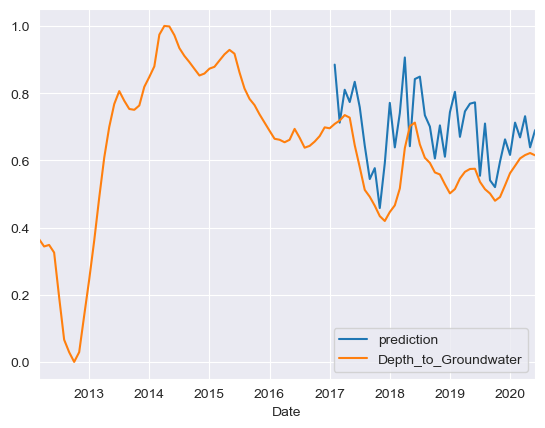

In [412]:
result[-100:].plot(legend=True, label='prediction')
df['Depth_to_Groundwater'][-100:].plot(legend=True)

In [297]:
result.name = 'Depth_to_Groundwater'
result.to_csv('predictions/rnn_multi/'+checkpoint+'.csv')

In [298]:
import winsound
winsound.Beep(2500,1000)

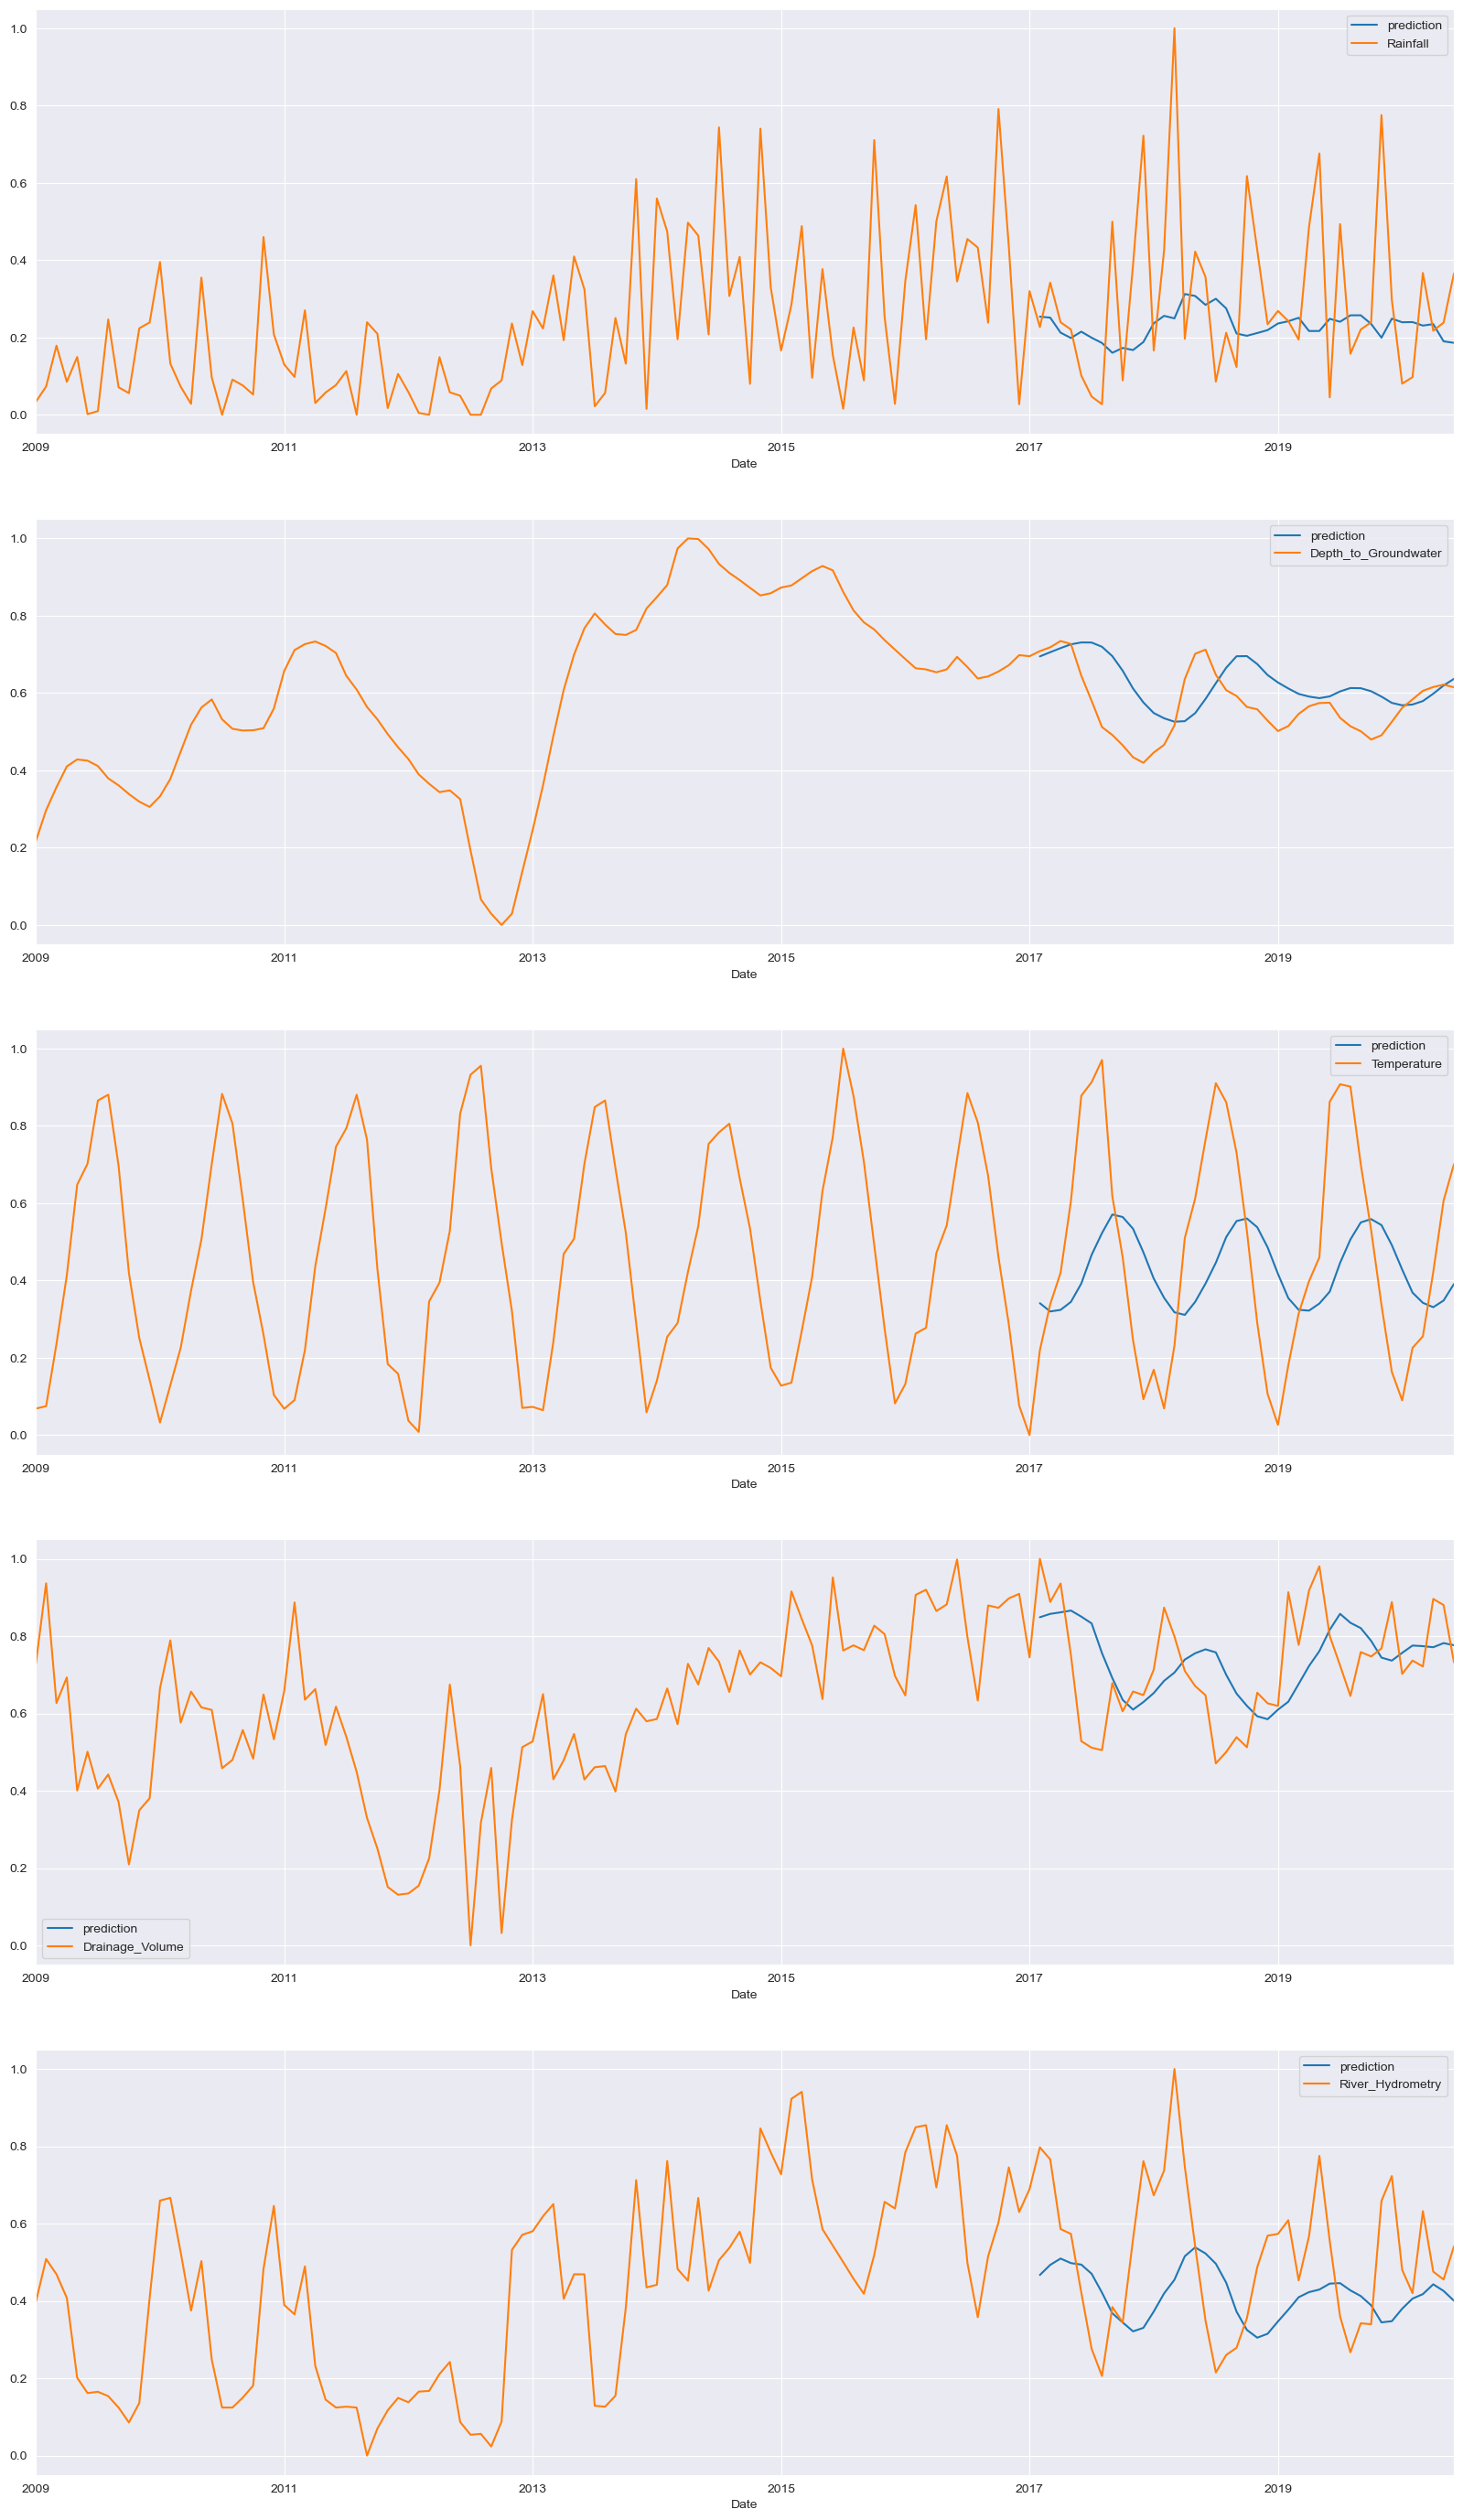

In [196]:
fig, ax = plt.subplots(nrows=5, ncols=1, figsize=(20, 35))
for i in range(5):
    saved_df.iloc[-1000:,i].plot(ax = ax[i], label='prediction', legend=True)
    df.iloc[-1000:,i].plot(ax = ax[i], legend=True)
plt.show()